In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [83]:
df = pd.read_csv('data.csv')

In [4]:
curid = -1

def fix_ids(x):
    global curid
    curid += 1
    return curid

df['Id'] = df['Id'].apply(fix_ids)

In [170]:
df = df.dropna()
# Removing outliers
df = df.drop(df[df['HighestSalary'] == 999].index)
df = df.drop(df[df['LowestSalary'] == 0].index)

In [ ]:
df[df['LowestSalary'] == 0]
df[df['HighestSalary'] == 999]

In [5]:
df["FullDescription"] = df["FullDescription"].str.replace(r"(\s*\<.*?\>\s*)", " ").str.strip()
df["FullDescription"] = df["FullDescription"].str.replace(r"&nbsp;", " ").str.strip()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,MonthPosted


In [6]:
avg_salary = [0] * len(df)
print(len(df))
print(len(avg_salary))
df['AverageSalary'] = avg_salary
df.sample(5)
df['AverageSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2
df.sample(5)

318477
318477


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
33770,33770,Retail/Trade Business Development Executive,Saunders Lynn & Co Pty Ltd,2018-10-10T00:00:00.000Z,"Newcastle, Maitland & Hunter",NaN,Sales,Sales Representatives/Consultants,Outstanding opportunity for an experienced sal...,Retail/Trade Business Development Executive ...,70,80,Full Time,75.0
11285,11285,Mechanic - Heavy Vehicle,Drake International,2018-10-04T00:00:00.000Z,Brisbane,Southern Suburbs & Logan,Trades & Services,Automotive Trades,Based at Salisbury two Mechanics working on re...,Our client is is a market leader in providing ...,60,70,Casual/Vacation,65.0
286777,286777,FIFO Chef - Cloudbreak,Sodexo,2019-01-20T00:00:00.000Z,NaN,NaN,NaN,NaN,"Are you tired of working 14+ hours a day, 6-7 ...",We think it’s time you changed your menu • ...,70,80,Full Time,75.0
106449,106449,Boilermaker,"Randstad - Construction, Property & Engineering",2018-10-29T00:00:00.000Z,Perth,"CBD, Inner & Western Suburbs",Trades & Services,Welders & Boilermakers,Randstad are looking for experienced boilermak...,Due to increased workload we are looking to ex...,100,120,Contract/Temp,110.0
121924,121924,GIS Graduate,ATCO Gas Australia,2018-11-07T00:00:00.000Z,Perth,Fremantle & Southern Suburbs,Science & Technology,"Environmental, Earth & Geosciences",We have an exciting opportunity for a passiona...,"ATCO Gas Australia owns, operates and maintain...",50,60,Full Time,55.0


In [80]:
salary_by_location = df.groupby('Location')['AverageSalary'].mean().nlargest(5)
salary_by_classification = df.groupby('Classification')['AverageSalary'].mean().nlargest(10)

In [18]:
salary_by_location.head(5)

Location
Sydney       102.204630
Brisbane      89.867512
Melbourne     87.680859
Perth         87.170869
Name: AverageSalary, dtype: float64

In [72]:
salary_by_classification.head(20)

Classification
CEO & General Management                  259.081152
Information & Communication Technology    176.958404
Consulting & Strategy                     166.152174
Mining, Resources & Energy                156.772727
Construction                              135.088204
Engineering                               126.715598
Legal                                     125.069005
Banking & Financial Services              122.399403
Healthcare & Medical                      111.176035
Government & Defence                      103.814330
Name: AverageSalary, dtype: float64

In [147]:
def plot_linegraph(series, xlabel, ylabel, title, c='green', rotate_x_axis=False):
    fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(series, color=c)
    plt.title(title)
    ax = plt.subplot()
    ax.set_xlabel(xlabel, fontsize='16')
    ax.set_ylabel(ylabel, fontsize='16')
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    #ax.set_xticklabels(rotation = (340), fontsize = 12, va='top', ha='left', labels=salary_by_classification.index)
    if rotate_x_axis:
        ax.set_xticklabels(rotation = (340), fontsize = 12, va='top', ha='left', labels=series.index)
    plt.show()

In [148]:
def plot_bargraph(series, xlabel, ylabel, title, c='green', rotate_x_axis=False):
    fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    objects = series.index
    y_pos = np.arange(len(objects))
    performance = series.values
    plt.bar(y_pos, performance, align='center', alpha=0.5, color='red')
    plt.xticks(y_pos, objects)
    plt.title(title)
    plt.xlabel(xlabel, fontsize='16')
    plt.ylabel(ylabel, fontsize='16')
    ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
    if rotate_x_axis:
        ax.set_xticklabels(rotation = (340), fontsize = 12, va='top', ha='left', labels=series.index)
    plt.show()

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


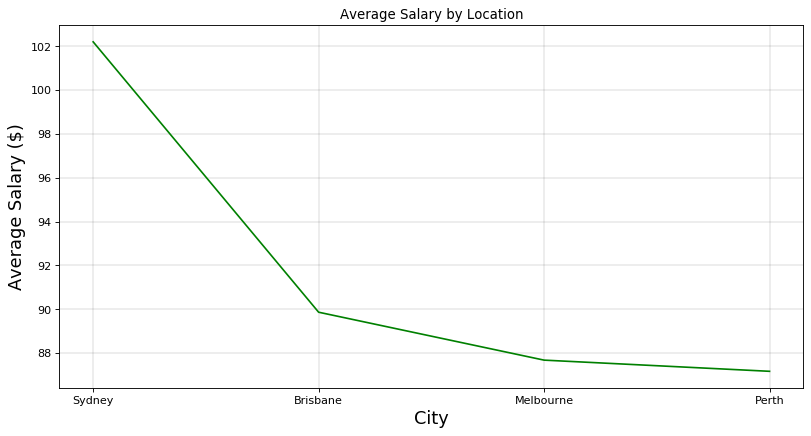

In [106]:

plot_linegraph(salary_by_location, "City", "Average Salary ($)", "Average Salary by Location")

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


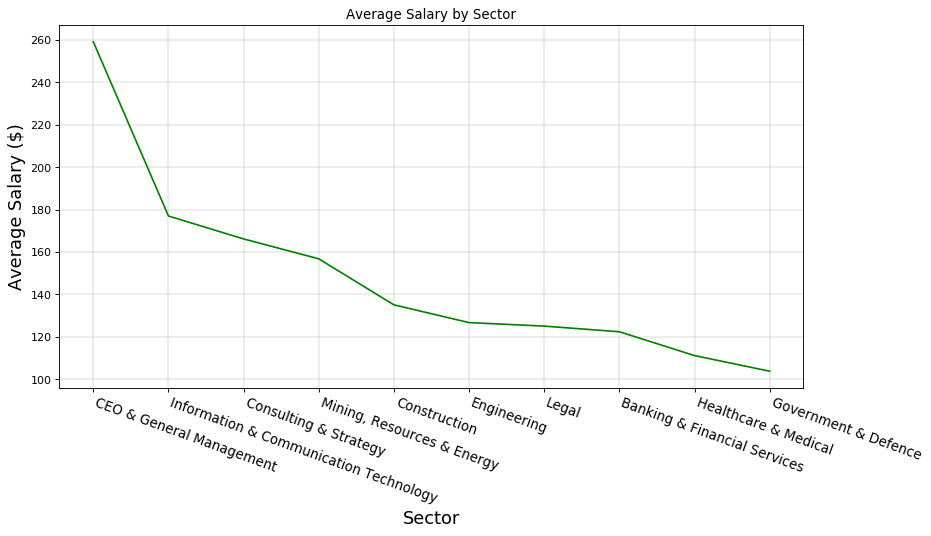

In [108]:
plot_linegraph(salary_by_classification, "Sector", "Average Salary ($)", "Average Salary by Sector", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


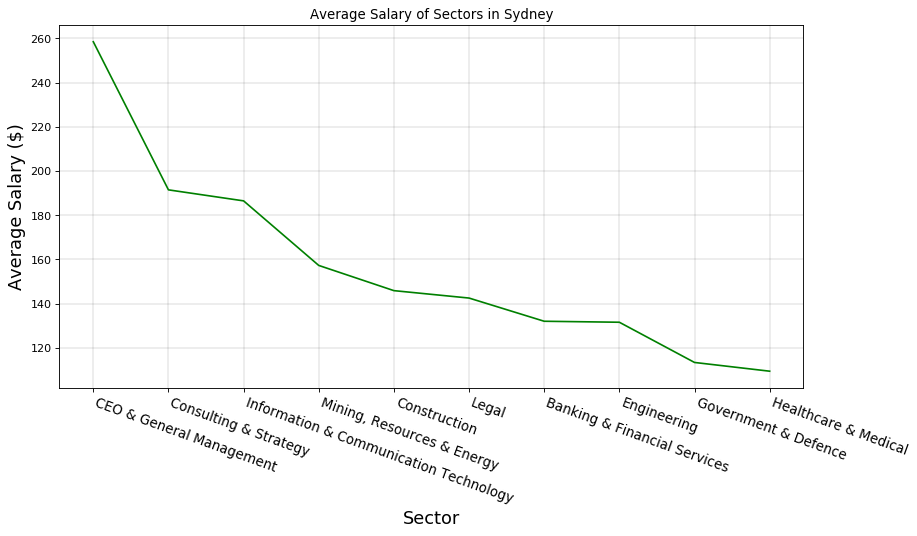

In [113]:
sydney_classification = df[df['Location']=='Sydney'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Sydney", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


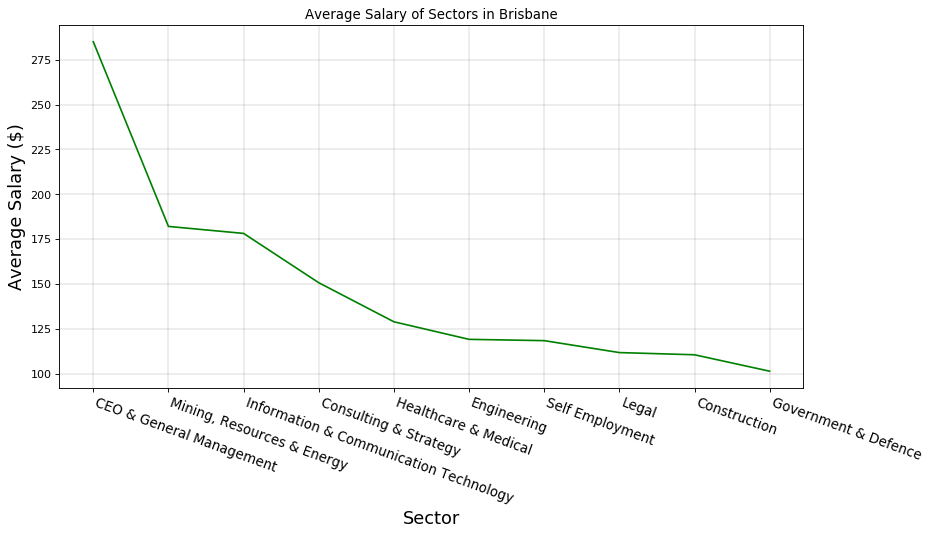

In [115]:
sydney_classification = df[df['Location']=='Brisbane'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Brisbane", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


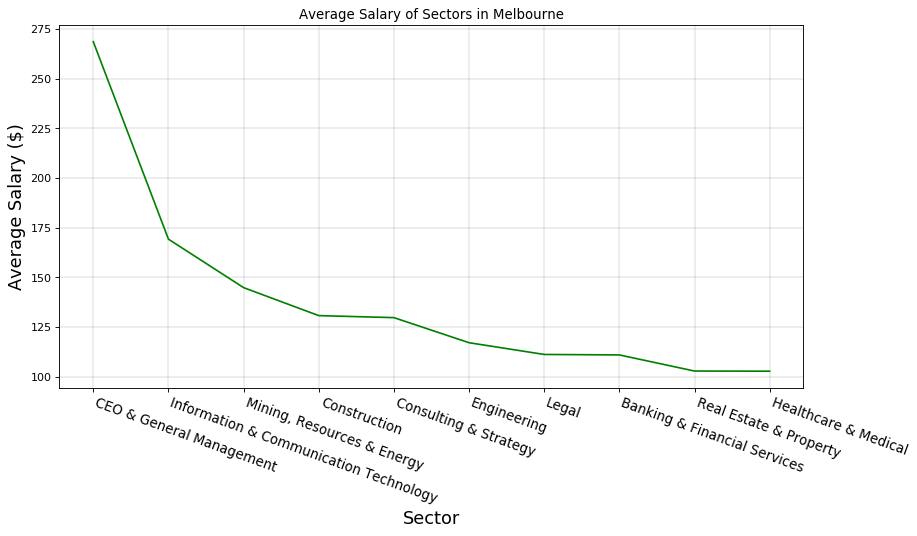

In [116]:
sydney_classification = df[df['Location']=='Melbourne'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Melbourne", rotate_x_axis=True)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


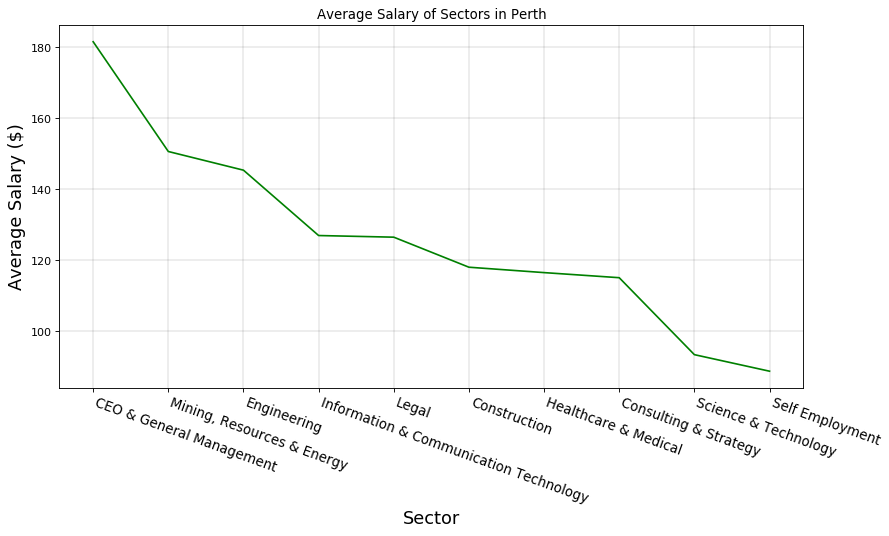

In [117]:
sydney_classification = df[df['Location']=='Perth'].groupby('Classification')['AverageSalary'].mean().nlargest(10)
plot_linegraph(sydney_classification, "Sector", "Average Salary ($)", "Average Salary of Sectors in Perth", rotate_x_axis=True)

In [141]:
cities = ['Sydney', 'Brisbane', 'Melbourne', 'Perth']
job_popularity = [dict(), dict(), dict(), dict()]
for i in range(0,len(cities)):
    job_popularity[cities[i]][] len(df[df['Location']==cities[i]])
market_size_series = pd.Series(market_size)

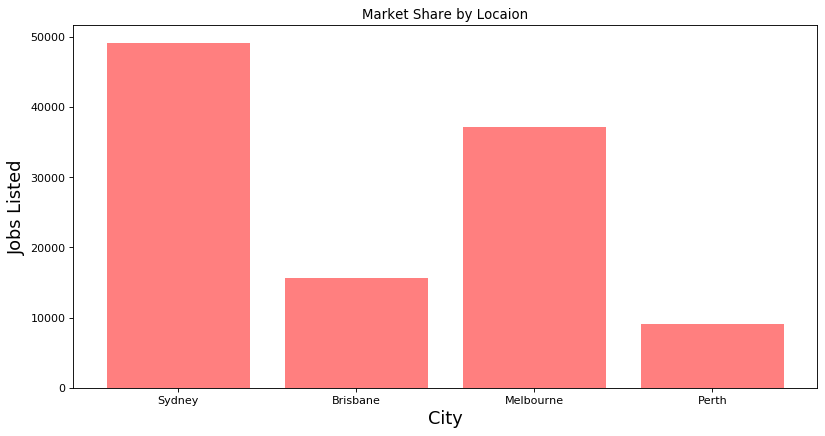

In [142]:
plot_bargraph(market_size_series, "City", "Jobs Listed", "Market Share by Locaion", rotate_x_axis=False)

In [142]:
# sydney_classification = df.groupby('Location')['Classification']

In [144]:
def add_month_from_date(x):
    return int(x.split('-')[1])
    
mth_field = [''] * len(df)
df['MonthPosted'] = mth_field
df['MonthPosted'] = df['Date'].apply(add_month_from_date)

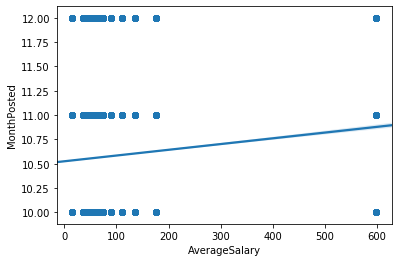

In [157]:
sns.regplot(x="AverageSalary", y="MonthPosted", data=df)

In [47]:
cities = ['Brisbane', 'Sydney', 'Melbourne', 'Perth']
hottest_jobs = []
for c in cities:
    s = (df[df['Location']==c].groupby('Classification')['Id'].count())
    hottest_jobs.append(s)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


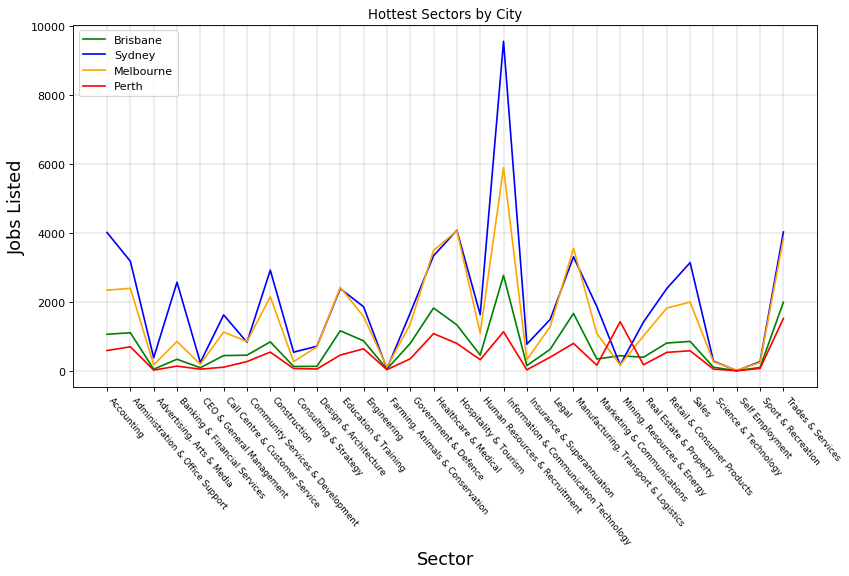

In [54]:
colors = ['green', 'blue', 'orange', 'red']
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
series = None
for i in range(0,len(hottest_jobs)):
    series = hottest_jobs[i]
    plt.plot(series, color=colors[i], label=cities[i])
plt.title("Hottest Sectors by City")
ax = plt.subplot()
ax.set_xlabel("Sector", fontsize='16')
ax.set_ylabel("Jobs Listed", fontsize='16')
ax.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xticklabels(rotation = (310), fontsize = 8, va='top', ha='left', labels=series.index)
ax.legend(loc="upper left")
plt.show()

In [59]:
for i in range(0,len(cities)):
    print("\n\n-- Hottest Sectors in "+cities[i]+" --")
    print(hottest_jobs[i].nlargest(5))



-- Hottest Sectors in Brisbane --
Classification
Information & Communication Technology    2768
Trades & Services                         1993
Healthcare & Medical                      1824
Manufacturing, Transport & Logistics      1667
Hospitality & Tourism                     1335
Name: Id, dtype: int64


-- Hottest Sectors in Sydney --
Classification
Information & Communication Technology    9548
Hospitality & Tourism                     4074
Trades & Services                         4026
Accounting                                4010
Healthcare & Medical                      3339
Name: Id, dtype: int64


-- Hottest Sectors in Melbourne --
Classification
Information & Communication Technology    5889
Hospitality & Tourism                     4060
Trades & Services                         3831
Manufacturing, Transport & Logistics      3556
Healthcare & Medical                      3493
Name: Id, dtype: int64


-- Hottest Sectors in Perth --
Classification
Trades & Services         

In [133]:
df[df['HighestSalary']== 999]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
22979,37399499,General Manager,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,• Specially FMCG Products Experience • Must ha...,<ul>\n <li><strong>Specially FMCG P...,200,999,Full Time
22980,37398700,Chief Operating Officer,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,CEO & General Management,COO & MD,Automotive Aftermarket Products • ASX Business...,<ul>\n <li><strong>Automotive After...,200,999,Full Time
22981,37398465,Managing Director,AIMS International Executive Search,2018-10-05T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,CEO & General Management,CEO,• Base Salary to $280K plus Bonus • Property a...,<ul>\n <li><strong>Base Salary to $...,200,999,Full Time
22984,37397930,CHIEF INFORMATION OFFICER,Hender Consulting,2018-10-04T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,Pivotal IT leadership role with well establish...,<p><strong>Latrobe Health Services</strong></p...,200,999,Full Time
22986,37400016,Senior Project Manager,Hays Construction,2018-10-05T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Construction,Project Management,Manage a team of Construction professionals in...,<p>Manage a team of Construction professionals...,200,999,Full Time
22987,37400001,Change Manager,Clicks IT Recruitment,2018-10-05T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Consulting & Strategy,Management & Change Consulting,Our client is seeking an experienced Change Ma...,"<p>As an experienced Change Manager, you will ...",200,999,Contract/Temp
22989,37400030,General Manager Group Control and Reporting,West Recruitment,2018-10-05T00:00:00.000Z,Sydney,Parramatta & Western Suburbs,Accounting,Financial Managers & Controllers,Newly created role to transform the financial ...,<p><strong>The Employer</strong></p>\n ...,200,999,Full Time
22990,37399708,Senior Commercial Manager - Sales,Ambition Finance,2018-10-05T00:00:00.000Z,Sydney,Southern Suburbs & Sutherland Shire,Accounting,Strategy & Planning,Partners with the Chief Sales Officer (CSO) to...,<p><br> <strong>About The Company</strong></p>...,200,999,Full Time
22991,37399694,Senior Commercial Manager - Sales,Ambition Finance,2018-10-05T00:00:00.000Z,Sydney,Southern Suburbs & Sutherland Shire,Accounting,Management,Partners with the Chief Sales Officer (CSO) to...,<p><br> <strong>About The Company</strong></p>...,200,999,Full Time
22992,37399663,Senior Commercial Manager - Sales,Ambition Finance,2018-10-05T00:00:00.000Z,Sydney,Southern Suburbs & Sutherland Shire,Accounting,Analysis & Reporting,Partners with the Chief Sales Officer (CSO) to...,<p><br> <strong>About The Company</strong></p>...,200,999,Full Time


In [172]:
#min_sal = (df.groupby('Classification'))['LowestSalary'].nsmallest(1)
min_sal = df[df['JobType']=='Full Time'].groupby('Classification').min(level='LowestSalary')['LowestSalary']
max_sal = df[df['JobType']=='Full Time'].groupby('Classification').max(level='HighestSalary')['HighestSalary']
print(min_sal)
print(max_sal)

Classification
Accounting                                30
Administration & Office Support           30
Advertising, Arts & Media                 30
Banking & Financial Services              30
CEO & General Management                  30
Call Centre & Customer Service            30
Community Services & Development          30
Construction                              30
Consulting & Strategy                     30
Design & Architecture                     30
Education & Training                      30
Engineering                               30
Farming, Animals & Conservation           30
Government & Defence                      30
Healthcare & Medical                      30
Hospitality & Tourism                     30
Human Resources & Recruitment             30
Information & Communication Technology    30
Insurance & Superannuation                30
Legal                                     30
Manufacturing, Transport & Logistics      30
Marketing & Communications              

In [171]:
labels = []
min_vals = []
max_vals = []
for v in min_sal.index:
    labels.append(v[0])
    min_vals.append(v[1])
    print(v[1])
i = 0
print("MAX VALS")
for v in max_sal.index:
    s = v[1]-min_vals[i]
    max_vals.append(s)
    print(s)
    i+=1

c
d
d
a
E
a
o
o
o
e
d
n
a
o
e
o
u
n
n
e
a
a
i
e
e
a
c
e
p
r
MAX VALS


TypeError: unsupported operand type(s) for -: 'str' and 'str'

TypeError: unhashable type: 'numpy.ndarray'

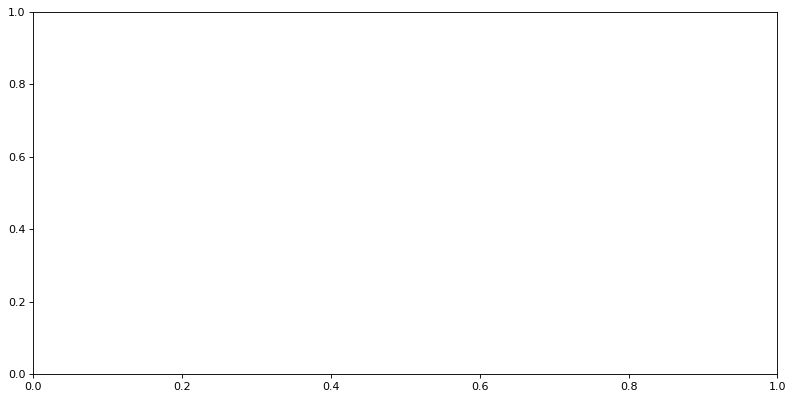

In [117]:


fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')

ax = plt.subplot()

ax.bar(labels, min_vals, 0.5,label='Highest Salary', color='RED')
ax.bar(labels, max_vals, 0.5, label='Lowest Salary', color='GREEN', bottom=min_vals)

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [156]:
df.sample(20)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,MonthPosted
32821,37420017,Administration Assistant,Hays Office Support,2018-10-09T00:00:00.000Z,Melbourne,Eastern Suburbs,Administration & Office Support,Administrative Assistants,"Leading University in Eastern Suburbs, Adminis...","<p>Leading University in Eastern Suburbs, Admi...",60,70,Contract/Temp,10
162057,37932785&searchrequesttoken=28464b27-9e85-40b9...,Part time Food Delivery Driver in Carrum,Jora Local,2018-12-14T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Other,A restaurant in Carrum is seeking a part time ...,A restaurant in Carrum is seeking a part time ...,30,40,Part Time,12
122202,37649735,Medical Receptionist,Fullerton Health,2018-11-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Healthcare & Medical,Medical Administration,Fantastic opportunity for a Medical Receptioni...,"<h2 class=""subheading""><strong>Indooroopilly G...",50,60,Casual/Vacation,11
144059,37673366,Factory Workers & Assembly Workers,Career Access Partners,2018-11-09T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,"Manufacturing, Transport & Logistics","Warehousing, Storage & Distribution","We are looking for reliable Factory workers, P...","We are looking for reliable Factory Workers, P...",40,50,Full Time,11
83627,37497886,Bid Coordinator - Fitout / Refurbishment Contr...,Now Careers Pty Ltd,2018-10-17T00:00:00.000Z,Sydney,North Shore & Northern Beaches,Construction,Other,Bid Coordinator for well established fitout / ...,<strong><em>The client:</em></strong><br> This...,100,120,Full Time,10
148697,37678087,Roster & Administrator Clerk,NRMA Motoring & Services,2018-11-09T00:00:00.000Z,Sydney,"CBD, Inner West & Eastern Suburbs",Administration & Office Support,Administrative Assistants,Looking for energetic and attention to detail ...,<p>&nbsp;</p> <ul> <li>Provide roster support ...,60,70,Full Time,11
177709,37937194&searchrequesttoken=0e849f7e-512c-4fd5...,Property Manager,LJ Hooker Stanhope Gardens/Kellyville,2018-12-14T00:00:00.000Z,Sydney,North West & Hills District,Real Estate & Property,Residential Leasing & Property Management,The opportunity to join a dynamic brand locate...,<p>The opportunity to join a dynamic brand loc...,70,80,Full Time,12
63776,37462959,DIRECTOR REGULATORY PROGRAMS,Peter William Partners,2018-10-15T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Government & Defence,Government - State,EPA Victoria works for all Victorians to prote...,<ul> <li>Drive operational excellence &amp;&nb...,150,200,Full Time,10
21036,37399044,Infrastrucutre Support Engineer,Talent – Winner ‘Seek Large Recruitment Agency...,2018-10-05T00:00:00.000Z,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Infrastrucutre Support Engineer for 12 month c...,-&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;Level 2 Inf...,150,200,Contract/Temp,10
78910,37502697,Developer C# .NET Full Stack,Ironbark Software Pty Ltd,2018-10-17T00:00:00.000Z,Brisbane,Southern Suburbs & Logan,Information & Communication Technology,Developers/Programmers,Experienced Software developer for leading ERP...,<h2><strong><em>Ironbark Software</em></strong...,70,80,Full Time,10


In [161]:
months = list(range(1,12+1))
post_freq = dict()
month_posted = df.groupby('MonthPosted')['Id'].count()
#for m in months:
    #post_freq[m] = 
#    print("Month "+str(m)+" (Posted = "+str( post_freq[m])+")")
#post_freq_series = pd.Series(post_freq)

C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


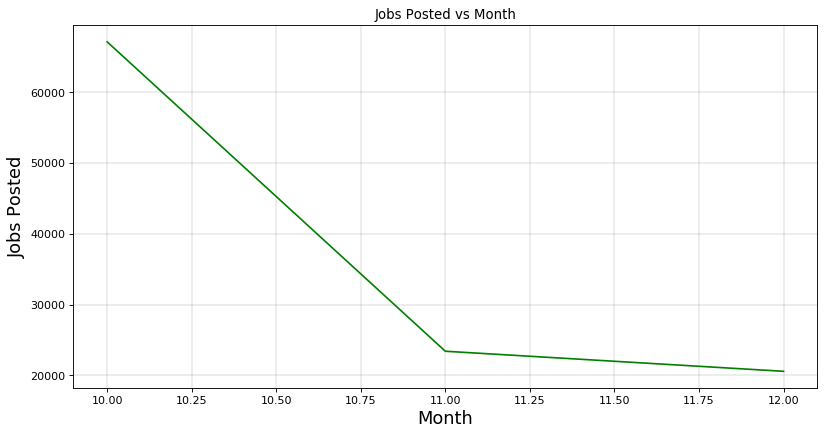

In [162]:
plot_linegraph(month_posted, "Month", "Jobs Posted", "Jobs Posted vs Month", rotate_x_axis=False)